In [1]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

## OGD Severity Data

In [2]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/MPT_Data/MPT_ECM_Prediction/Deff_CSVs/' # The folder where the Deff csv files are located

ages = ['P14', 'P21', 'P28', 'P35', 'P70']

vids = 5
slices = 3
for age in ages:
    for slic in range(1,slices+1):
        for vid in range(1, vids+1):
            file_list.append('{}_40nm_s{}_v{}'.format(age, slic, vid))
                

In [3]:
file_list

['P14_40nm_s1_v1',
 'P14_40nm_s1_v2',
 'P14_40nm_s1_v3',
 'P14_40nm_s1_v4',
 'P14_40nm_s1_v5',
 'P14_40nm_s2_v1',
 'P14_40nm_s2_v2',
 'P14_40nm_s2_v3',
 'P14_40nm_s2_v4',
 'P14_40nm_s2_v5',
 'P14_40nm_s3_v1',
 'P14_40nm_s3_v2',
 'P14_40nm_s3_v3',
 'P14_40nm_s3_v4',
 'P14_40nm_s3_v5',
 'P21_40nm_s1_v1',
 'P21_40nm_s1_v2',
 'P21_40nm_s1_v3',
 'P21_40nm_s1_v4',
 'P21_40nm_s1_v5',
 'P21_40nm_s2_v1',
 'P21_40nm_s2_v2',
 'P21_40nm_s2_v3',
 'P21_40nm_s2_v4',
 'P21_40nm_s2_v5',
 'P21_40nm_s3_v1',
 'P21_40nm_s3_v2',
 'P21_40nm_s3_v3',
 'P21_40nm_s3_v4',
 'P21_40nm_s3_v5',
 'P28_40nm_s1_v1',
 'P28_40nm_s1_v2',
 'P28_40nm_s1_v3',
 'P28_40nm_s1_v4',
 'P28_40nm_s1_v5',
 'P28_40nm_s2_v1',
 'P28_40nm_s2_v2',
 'P28_40nm_s2_v3',
 'P28_40nm_s2_v4',
 'P28_40nm_s2_v5',
 'P28_40nm_s3_v1',
 'P28_40nm_s3_v2',
 'P28_40nm_s3_v3',
 'P28_40nm_s3_v4',
 'P28_40nm_s3_v5',
 'P35_40nm_s1_v1',
 'P35_40nm_s1_v2',
 'P35_40nm_s1_v3',
 'P35_40nm_s1_v4',
 'P35_40nm_s1_v5',
 'P35_40nm_s2_v1',
 'P35_40nm_s2_v2',
 'P35_40nm_s

In [4]:
len(file_list)

75

In [5]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
#T = 310.15 # K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 33.45 # nm
r_f = 0.3 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

6.4191325696459645


In [7]:
file_list[0:15]

['P14_40nm_s1_v1',
 'P14_40nm_s1_v2',
 'P14_40nm_s1_v3',
 'P14_40nm_s1_v4',
 'P14_40nm_s1_v5',
 'P14_40nm_s2_v1',
 'P14_40nm_s2_v2',
 'P14_40nm_s2_v3',
 'P14_40nm_s2_v4',
 'P14_40nm_s2_v5',
 'P14_40nm_s3_v1',
 'P14_40nm_s3_v2',
 'P14_40nm_s3_v3',
 'P14_40nm_s3_v4',
 'P14_40nm_s3_v5']

In [9]:
P14_files = file_list[0:15]
P21_files = file_list[15:30]
P28_files = file_list[30:45]
P35_files = file_list[45:60]
P70_files = file_list[60:75]

In [10]:
P70_files

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [11]:
Deff_vals_P14 = pd.DataFrame()

for file in P14_files:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P14 = pd.concat([Deff_vals_P14, temp], ignore_index=True)

Deff_vals_P14.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P14['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P14['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P14 = Deff_vals_P14.dropna()
Deff_vals_P14 = Deff_vals_P14.reset_index(drop=True)

Deff_vals_P21 = pd.DataFrame()

for file in P21_files:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P21 = pd.concat([Deff_vals_P21, temp], ignore_index=True)

Deff_vals_P21.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P21['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P21['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P21 = Deff_vals_P21.dropna()
Deff_vals_P21 = Deff_vals_P21.reset_index(drop=True)

Deff_vals_P28 = pd.DataFrame()

for file in P28_files:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P28 = pd.concat([Deff_vals_P28, temp], ignore_index=True)

Deff_vals_P28.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P28['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P28['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P28 = Deff_vals_P28.dropna()
Deff_vals_P28 = Deff_vals_P28.reset_index(drop=True)

Deff_vals_P35 = pd.DataFrame()

for file in P35_files:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P35 = pd.concat([Deff_vals_P35, temp], ignore_index=True)

Deff_vals_P35.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P35['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P35['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P35 = Deff_vals_P35.dropna()
Deff_vals_P35 = Deff_vals_P35.reset_index(drop=True)

Deff_vals_P70 = pd.DataFrame()

for file in P70_files:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P70 = pd.concat([Deff_vals_P70, temp], ignore_index=True)

Deff_vals_P70.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P70['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P70['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P70 = Deff_vals_P70.dropna()
Deff_vals_P70 = Deff_vals_P70.reset_index(drop=True)

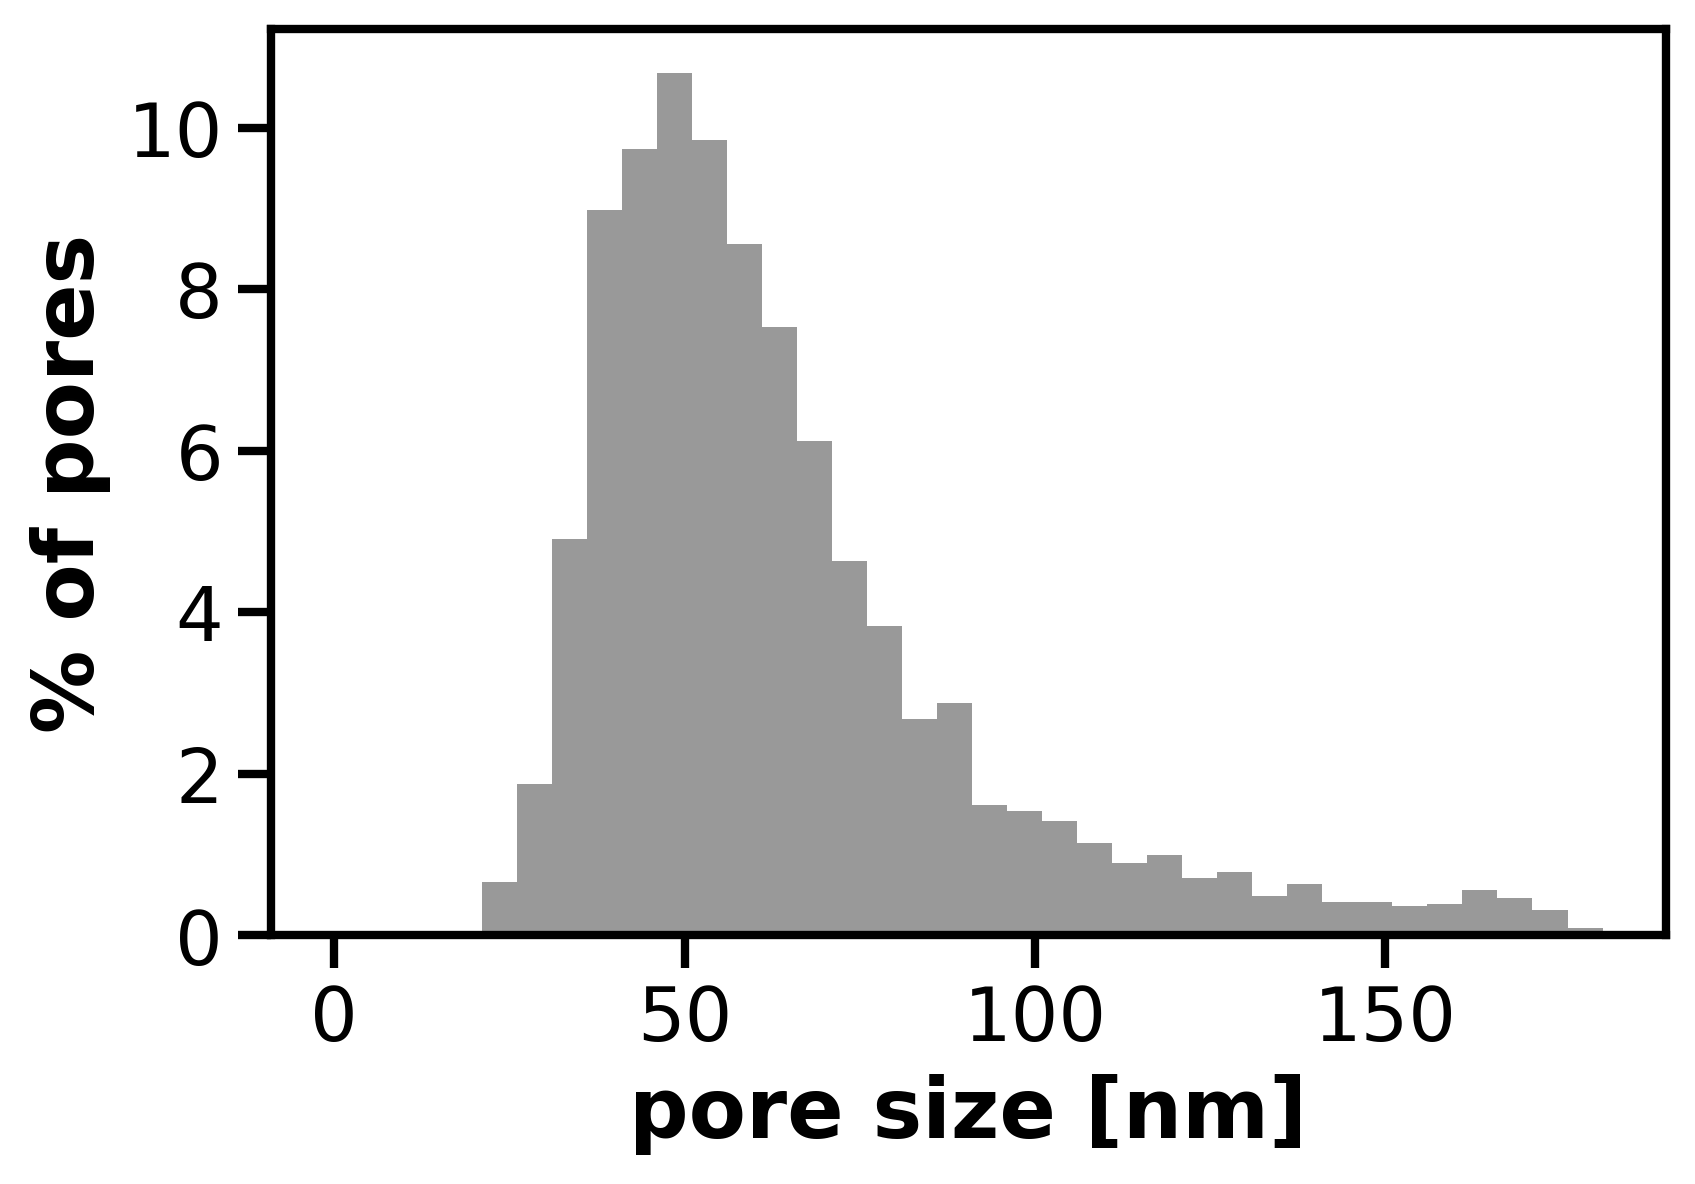

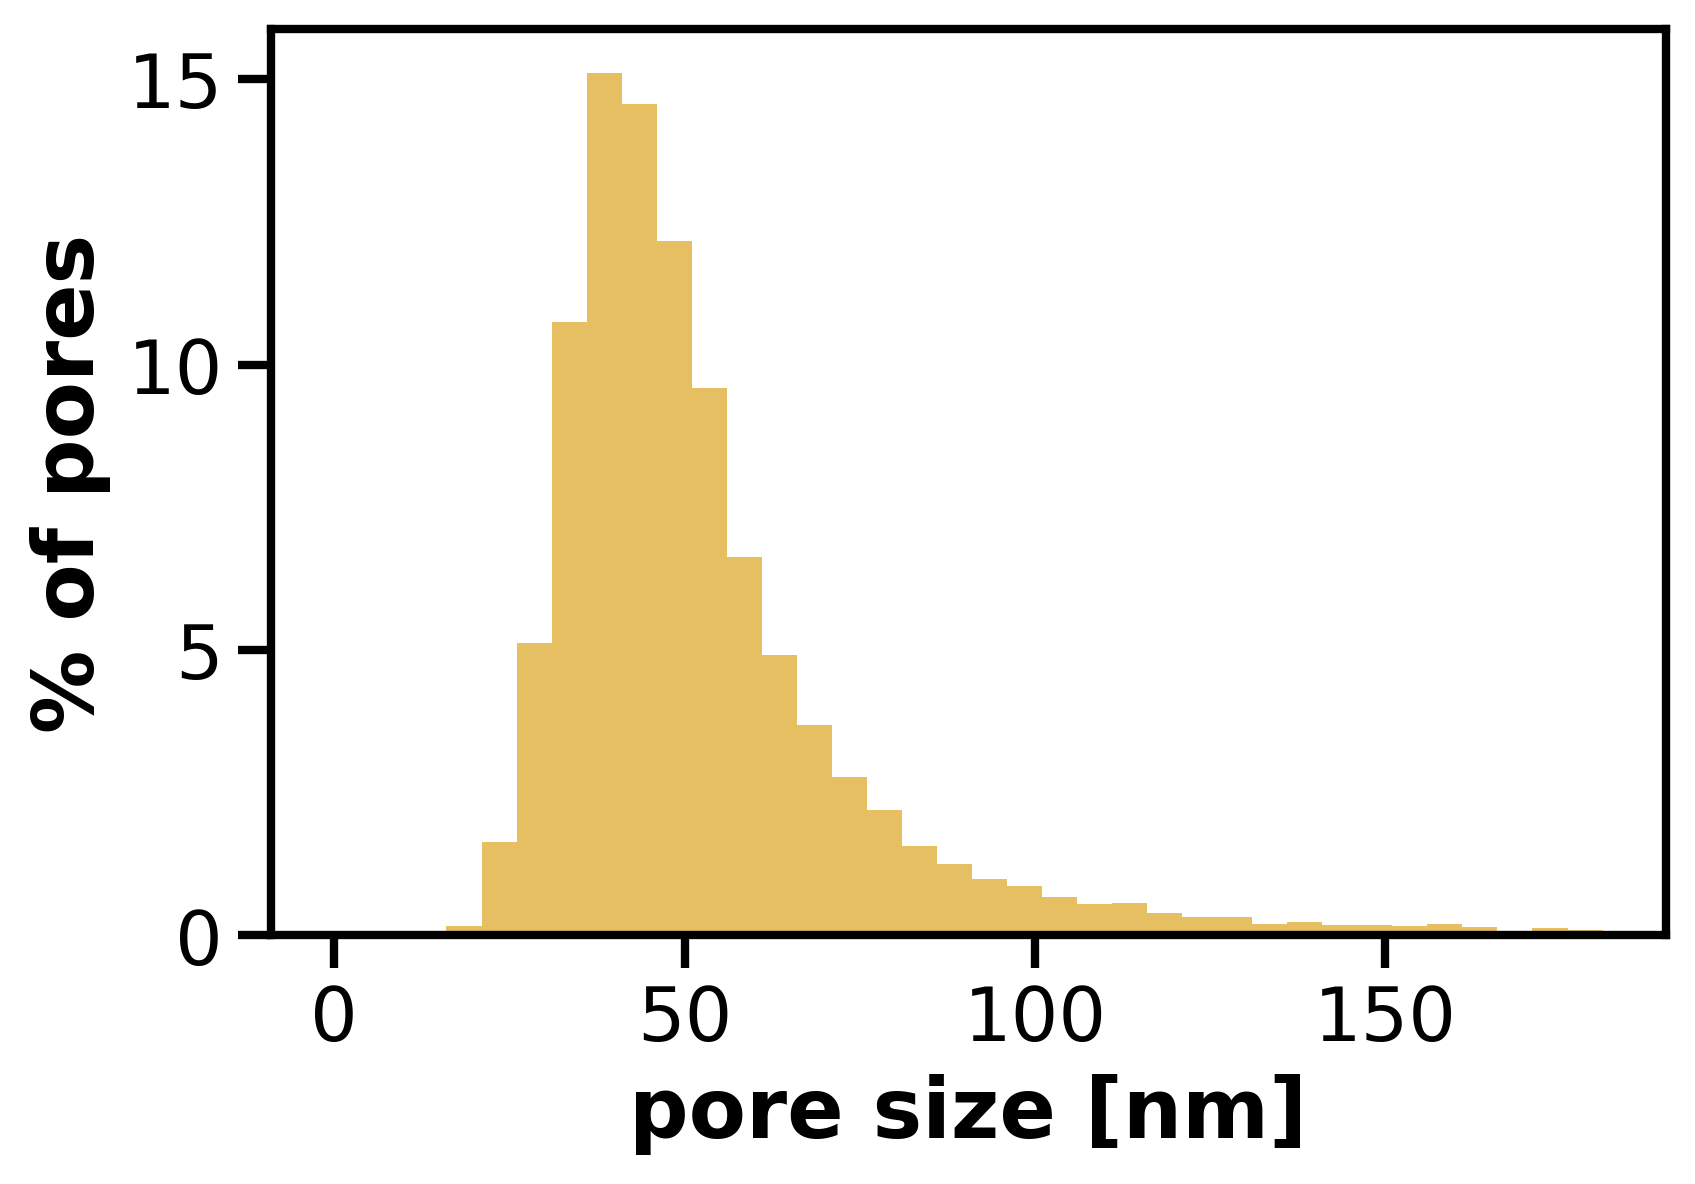

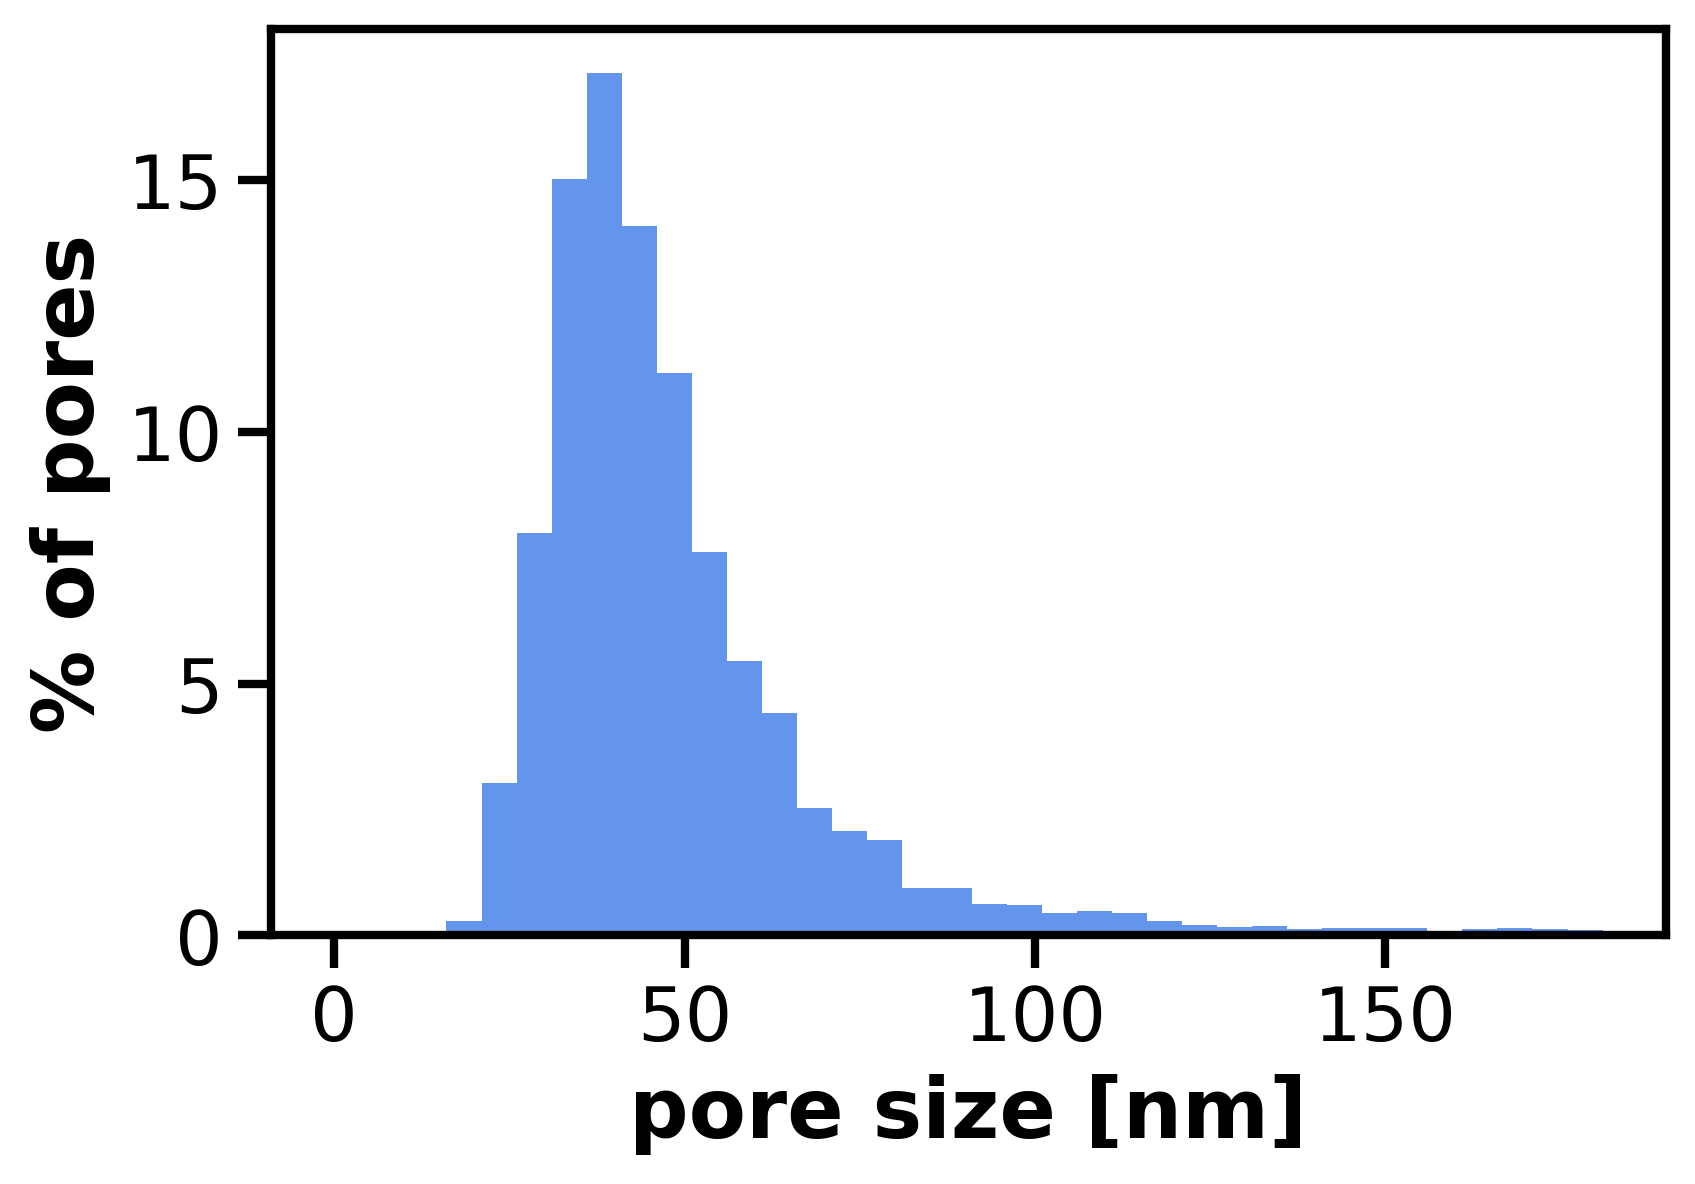

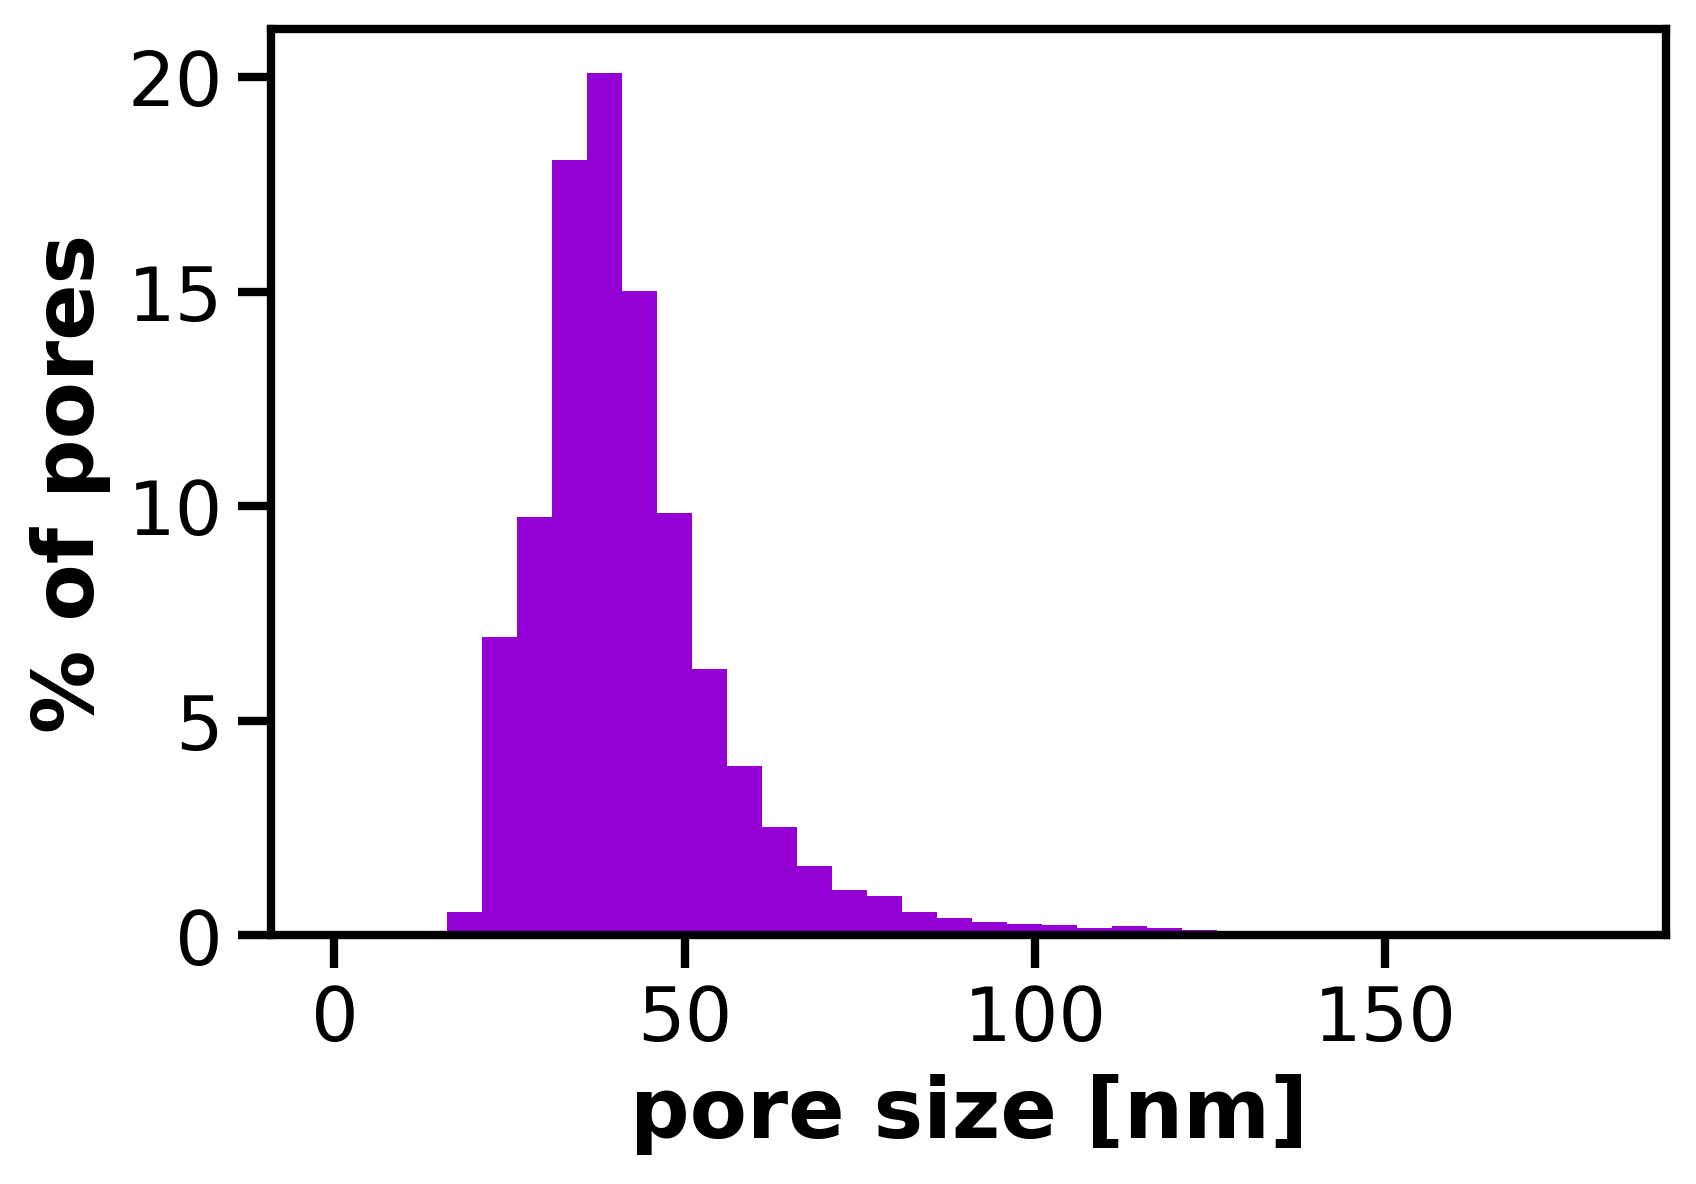

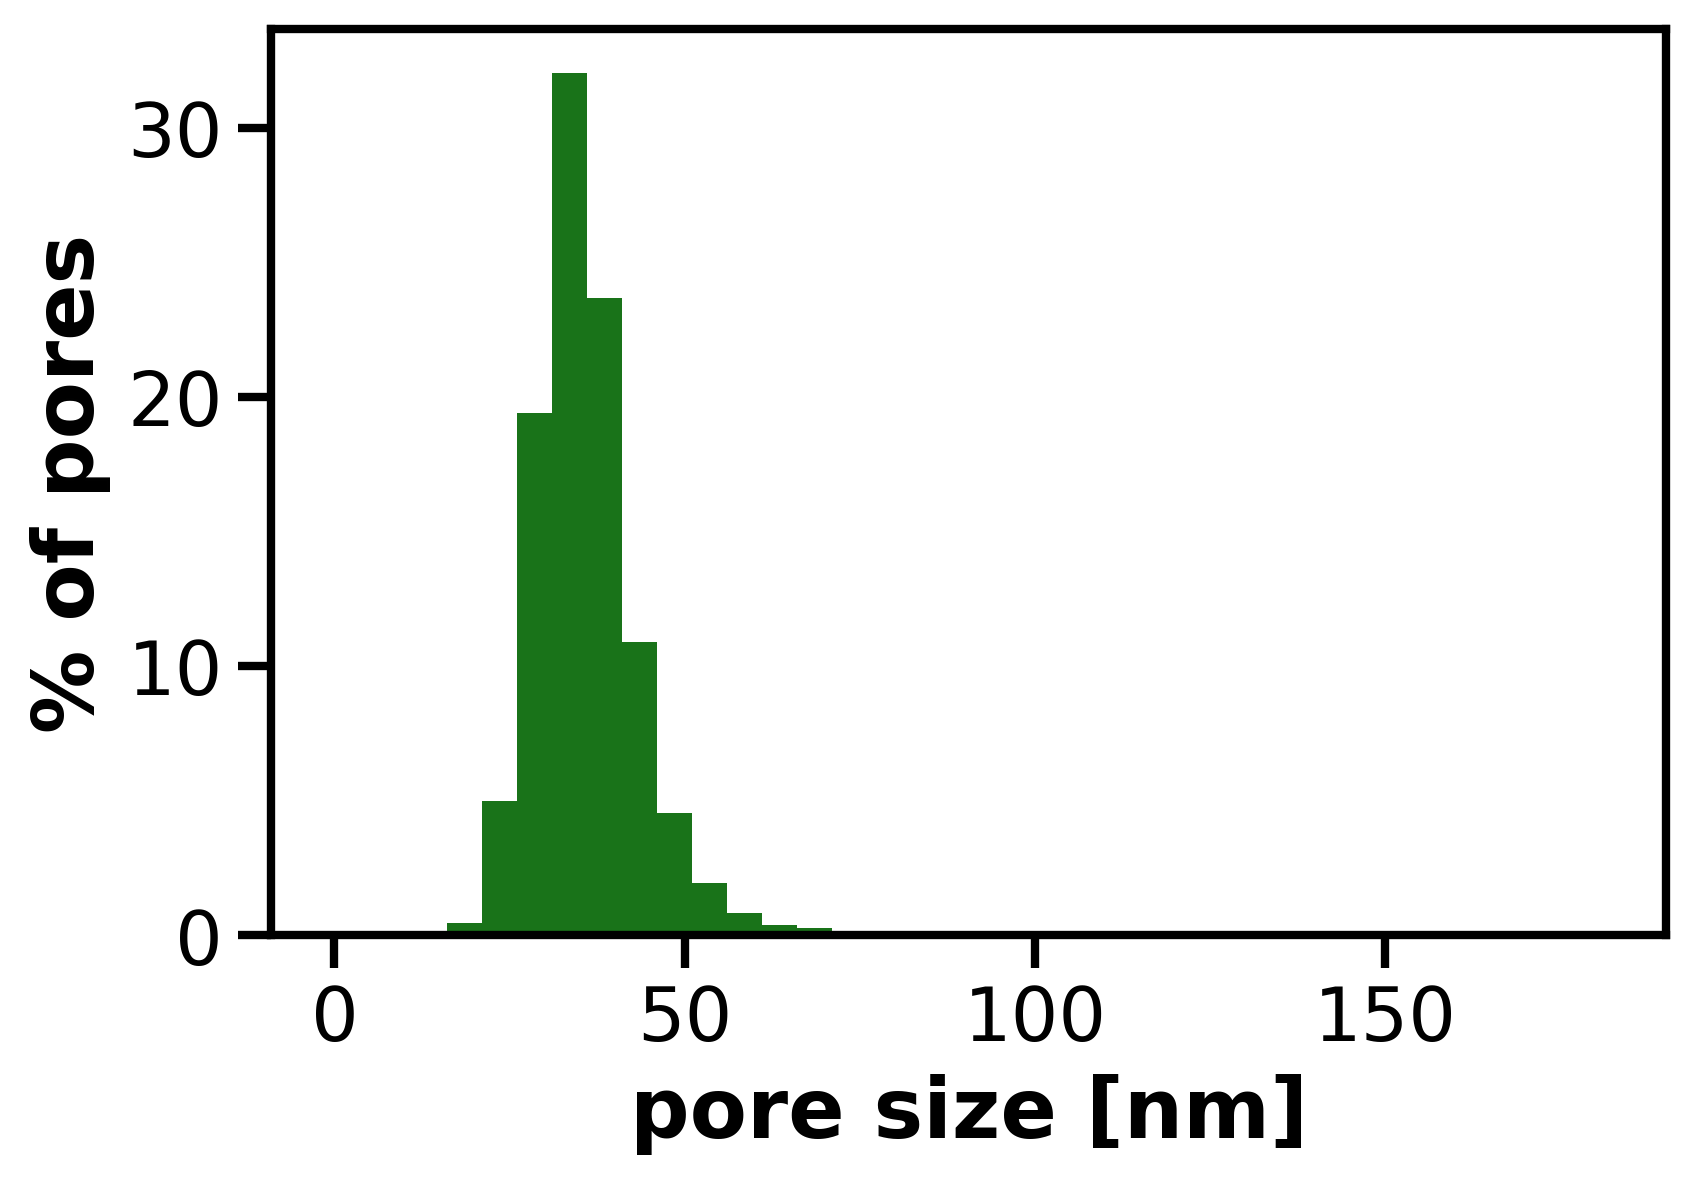

In [40]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_P14["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P14.index) / len(Deff_vals_P14.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181],color='grey', alpha=0.8)
#ax.xaxis.set_ticks(np.arange(0, 71, 5))
#ax.yaxis.set_ticks(np.arange(0, 18, 5))
ax.set_ylabel('% of pores', fontsize=20, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax.set_title('NC')
ax.tick_params(labelsize=18, length=8, width=2)
#ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

    
plt.figure(2, dpi=300).tight_layout()
ax2 = plt.gca()    
ax2 = Deff_vals_P21["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P21.index) / len(Deff_vals_P21.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181], color='goldenrod', alpha=0.7)
#ax2.xaxis.set_ticks(np.arange(0, 71, 5))
#ax2.yaxis.set_ticks(np.arange(0, 18, 5))
ax2.set_ylabel('% of pores', fontsize=20, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax2.set_title('OGD 0.5h')
ax2.tick_params(labelsize=18, length=8, width=2)
#ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)


plt.figure(3, dpi=300).tight_layout()
ax3 = plt.gca()  
ax3 = Deff_vals_P28["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P28.index) / len(Deff_vals_P28.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181], color='cornflowerblue')
#ax3.xaxis.set_ticks(np.arange(0, 71, 5))
#ax3.yaxis.set_ticks(np.arange(0, 18, 5))
ax3.set_ylabel('% of pores', fontsize=20, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax3.set_title('OGD 1.5h')
ax3.tick_params(labelsize=18, length=8, width=2)
#ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


plt.figure(4, dpi=300).tight_layout()
ax4 = plt.gca()
ax4 = Deff_vals_P35["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P35.index) / len(Deff_vals_P35.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181], color='darkviolet')
#ax4.xaxis.set_ticks(np.arange(0, 71, 5))
#ax4.yaxis.set_ticks(np.arange(0, 31, 10))
ax4.set_ylabel('% of pores', fontsize=20, weight='bold')
ax4.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax4.set_title('OGD 0.5h')
ax4.tick_params(labelsize=18, length=8, width=2)
#ax4.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)
    

plt.figure(5, dpi=300).tight_layout()
ax5 = plt.gca()
ax5 = Deff_vals_P70["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P70.index) / len(Deff_vals_P70.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181], color='darkgreen', alpha=0.9)
#ax5.xaxis.set_ticks(np.arange(0, 71, 5))
#ax5.yaxis.set_ticks(np.arange(0, 31, 10))
ax5.set_ylabel('% of pores', fontsize=20, weight='bold')
ax5.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax5.set_title('OGD 0.5h')
ax5.tick_params(labelsize=18, length=8, width=2)
#ax5.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax5.spines[axis].set_linewidth(2)

In [41]:
print(min(Deff_vals_P14["Pore size [nm]"]),',', max(Deff_vals_P14["Pore size [nm]"]),',',Deff_vals_P14["Pore size [nm]"].mean(),',',Deff_vals_P14["Pore size [nm]"].median())
print(min(Deff_vals_P21["Pore size [nm]"]),',', max(Deff_vals_P21["Pore size [nm]"]),',',Deff_vals_P21["Pore size [nm]"].mean(),',',Deff_vals_P21["Pore size [nm]"].median())
print(min(Deff_vals_P28["Pore size [nm]"]),',', max(Deff_vals_P28["Pore size [nm]"]),',',Deff_vals_P28["Pore size [nm]"].mean(),',',Deff_vals_P28["Pore size [nm]"].median())
print(min(Deff_vals_P35["Pore size [nm]"]),',', max(Deff_vals_P35["Pore size [nm]"]),',',Deff_vals_P35["Pore size [nm]"].mean(),',',Deff_vals_P35["Pore size [nm]"].median())
print(min(Deff_vals_P70["Pore size [nm]"]),',', max(Deff_vals_P70["Pore size [nm]"]),',',Deff_vals_P70["Pore size [nm]"].mean(),',',Deff_vals_P70["Pore size [nm]"].median())

20.545181011352465 , 4049.5015402510767 , 76.78947892528613 , 57.718328793761025
17.551766308181218 , 7130.5122836724995 , 57.288042623310936 , 46.955771036142664
18.35491143156436 , 3790.9468280090214 , 52.08355216151253 , 43.19532044153577
16.478718030688544 , 1608.6979887358061 , 44.046460232299026 , 39.513223269419065
17.762501666038915 , 127.16877038947857 , 35.97711816079312 , 34.912441387746384


In [15]:
pro_30 = 0
pro_40 = 0
pro_50 = 0
pro_60 = 0
pro_75 = 0
pro_80 = 0
pro_90 = 0
pro_100 = 0
total = len(Deff_vals_NT_cortex)

for traj in range(0,total):
    if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 30:
        pro_30 += 1
        if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 40:
            pro_40 += 1
            if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 50:
                pro_50 += 1
                if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 60:
                    pro_60 += 1
                    if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 75:
                        pro_75 += 1
                        if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 80:
                            pro_80 += 1
                            if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 90:
                                pro_90 += 1
                                if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 100:
                                    pro_100 += 1

                
percent_30 = pro_30/total*100
percent_40 = pro_40/total*100
percent_50 = pro_50/total*100

In [ ]:
print(percent_30, pro_30)
print(percent_40, pro_40)
print(percent_50)
print(pro_50)
print(pro_75)
print(pro_100)

In [17]:
print(min(Deff_vals_NT_striatum["Pore size [nm]"]),',', max(Deff_vals_NT_striatum["Pore size [nm]"]),',',Deff_vals_NT_striatum["Pore size [nm]"].mean(),',',Deff_vals_NT_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_0_5h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_0_5h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_0_5h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_0_5h_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_1_5h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_1_5h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_1_5h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_1_5h_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_3h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_3h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_3h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_3h_striatum["Pore size [nm]"].median())

15.262367585659309 , 1058.647694290047 , 24.26498997147301 , 22.356531342618283
15.140717196047968 , 344.705853034821 , 31.500144953485492 , 31.487838793939684
15.888567146111347 , 619.7117001658054 , 33.89640679833798 , 33.04265485785364
14.900581335599695 , 1827.5915826425667 , 36.777159355872215 , 34.029261052186925


In [ ]:
pro_30 = 0
pro_40 = 0
pro_50 = 0
pro_60 = 0
pro_75 = 0
pro_80 = 0
pro_90 = 0
pro_100 = 0
total = len(Deff_vals_OGD_3h_striatum)

for traj in range(0,total):
    if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 30:
        pro_30 += 1
        if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 40:
            pro_40 += 1
            if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 50:
                pro_50 += 1
                if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 60:
                    pro_60 += 1
                    if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 75:
                        pro_75 += 1
                        if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 80:
                            pro_80 += 1
                            if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 90:
                                pro_90 += 1
                                if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 100:
                                    pro_100 += 1

                
percent_30 = pro_30/total*100
percent_40 = pro_40/total*100
percent_50 = pro_50/total*100

In [ ]:
print(percent_30, pro_30)
print(percent_40, pro_40)
print(percent_50)
print(pro_50)
print(pro_75)
print(pro_100)

## Overlay plot

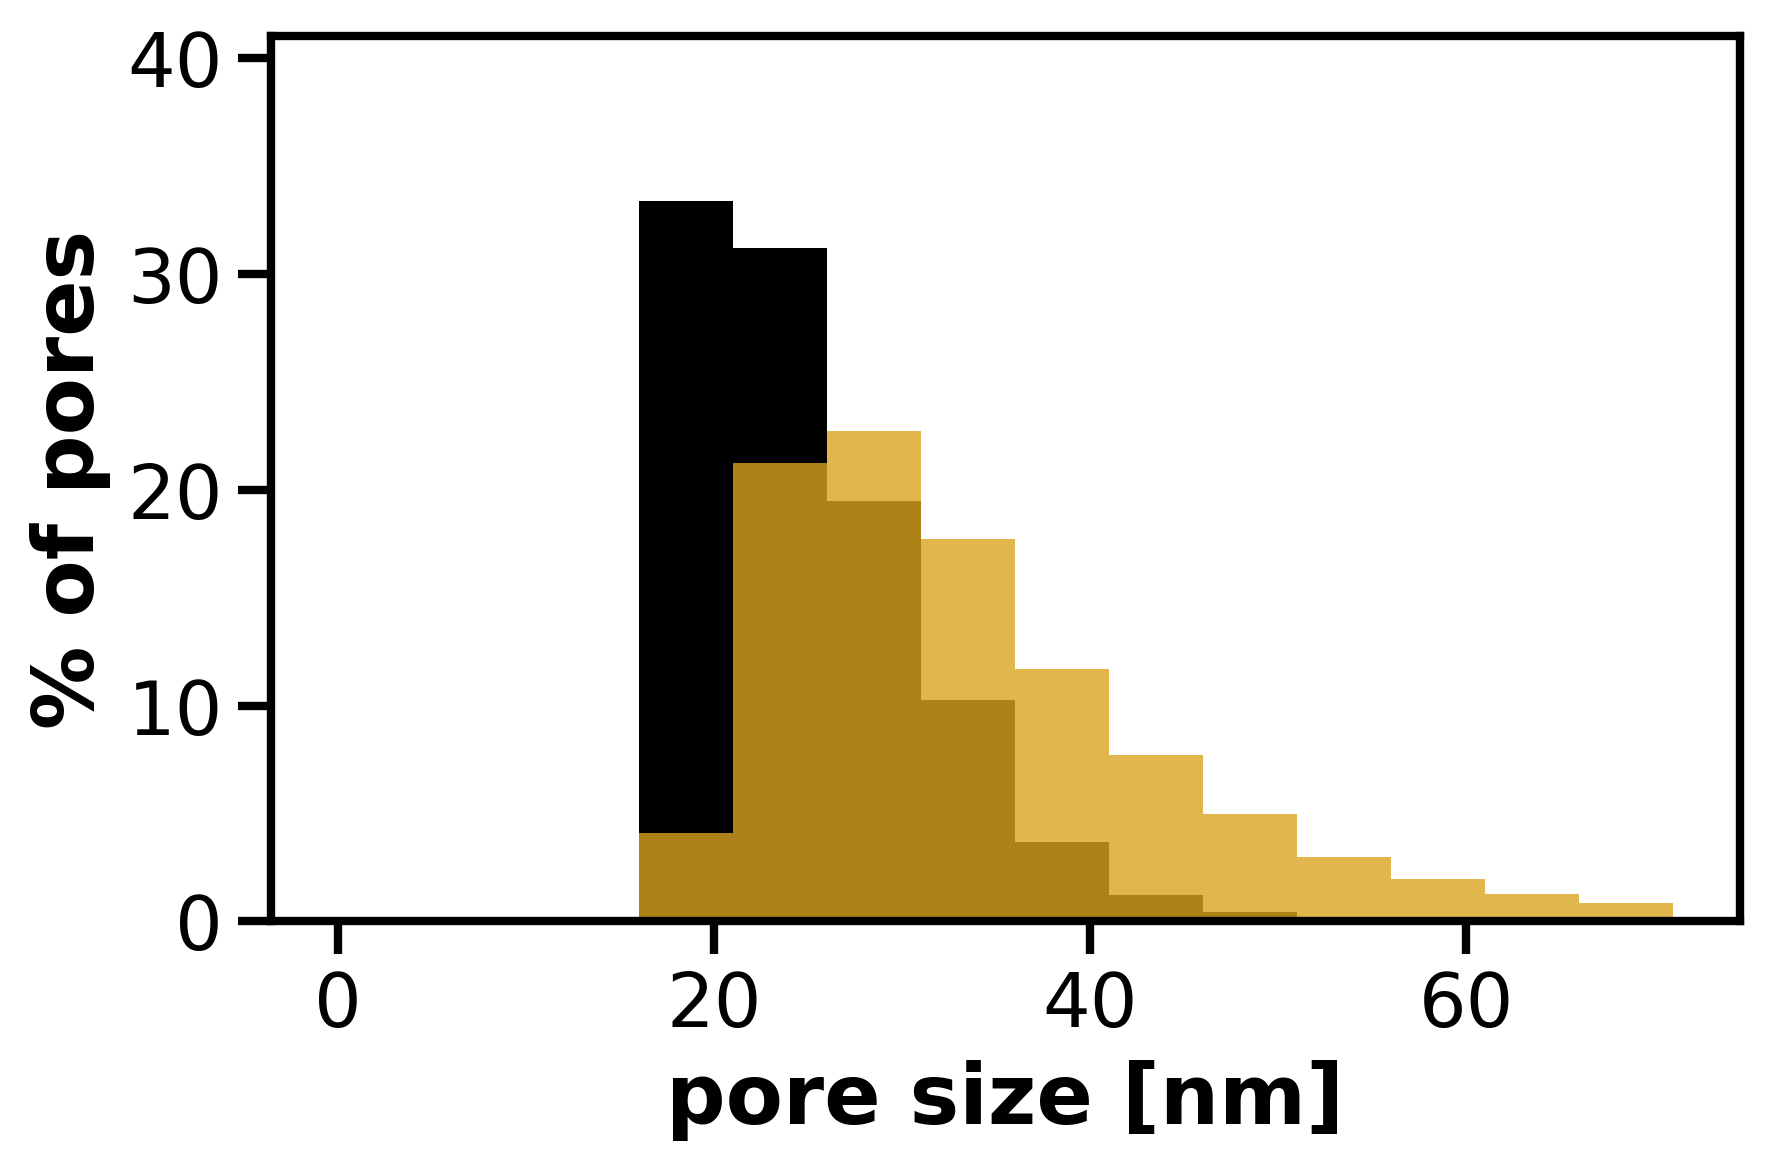

In [18]:
test_bins = np.linspace(1, 71, 15)

#NT_hist, NT_bins = np.histogram(Deff_vals_NT['Pore size [nm]'], density=1, bins=test_bins)
#OGD_3h_hist, OGD_3h_bins = np.histogram(Deff_vals_OGD_3h['Pore size [nm]'], density=1, bins=test_bins)

#NT_plot = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black')
#OGD_plot = Deff_vals_OGD_3h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h.index) / len(Deff_vals_OGD_3h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='goldenrod')

plt.rc('axes', linewidth=2)
#NT_plot, OGD_3h_plot = NT_hist, OGD_3h_hist
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, dpi=300).tight_layout()
#plt.bar(center, NT_plot, color='black', align='center', width=width, alpha=0.8, label='NT')
NT_plot = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black',label='NT')
plt.ylim(0, 41)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel('% of pores', fontsize=20, weight='bold')
plt.xlabel('pore size [nm]', fontsize=20, weight='bold')
plt.tick_params(labelsize=18, length=8, width=2)

plt.figure(1, dpi=300).tight_layout()
#plt.bar(center, OGD_3h_plot, color='goldenrod', align='center', width=width, alpha=1, label='OGD 3h')
OGD_plot = Deff_vals_OGD_3h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h.index) / len(Deff_vals_OGD_3h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], alpha = 0.8, color='goldenrod', label='OGD 3h')
plt.ylim(0, 41)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel('% of pores', fontsize=20, weight='bold')
plt.xlabel('pore size [nm]', fontsize=20, weight='bold')
plt.tick_params(labelsize=18, length=8, width=2)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)

#plt.legend(fontsize='x-large', loc=1)
plt.show()

## Playing around for comarison to E's paper

In [ ]:
Deff_vals_NT

In [ ]:
Do/(Deff_vals_NT["Deff [um^2/s]"].mean())

In [ ]:
test_bins